In [19]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import math as m
from math import sqrt
import sympy as sp
from sympy import collect, simplify, expand, fraction, latex
from IPython.display import display, Markdown, Math
import matplotlib.pyplot as plt
sp.init_printing(use_latex='mathjax')

In [132]:
class numden_coeff:
    def __init__(self, expr, order_num, order_denum, symb):
        self.num, self.denum = fraction(expr)
        self.symb = symb
        self.common_factor = None
        self.lst_denum_coeff = self.build_lst(self.denum, order_denum)
        self.lst_num_coeff = self.build_lst(self.num, order_num)
        
    def build_lst(self, poly, order):
        lst = [expand(poly).coeff(self.symb**i) for i in range((order), 0, -1)]
        lst.append(poly.subs(self.symb,0))
        if (self.common_factor == None):
            self.common_factor = lst[0]
            
        lst = [simplify(lst[i]/self.common_factor) for i in range(order + 1)]
        return lst
    
    def disp(self):
        display(Markdown(r"Numerator coefficients (\beta)"), self.lst_num_coeff)
        display(Markdown(r"Denominator coefficients (alpha)"), self.lst_denum_coeff)

# Problem 1

## Part 1

In [21]:
c, d, s, zeta, omega, r_1, s_0, s_1, a_0 = sp.symbols('c d s zeta omega r_1 s_0 s_1 a_0')
a = 1
b = 1
G1 = b/(s + a)
G2 = c/(s+d)
G = collect(expand(G1*G2), s)
B, A = fraction(G)
B_minus = B

$G_1(s)G_2(s) = G(s) =\;$ {{G}}

Therefore

$B = \;${{B}}

$A = \;$ {{A}}

Since $Deg(B)$ is clearly $0$, $B^{+} = 1$ and $B^- =\;$ {{B}}

In [22]:
A_m = s**2 + 2*s + 1
B_m = 1
G_m = B_m/A_m
B_m_prime = B_m/B_minus

$A_m$ is given to be {{A_m}}. Letting the desired model take the form of 

$G_m = \frac{\omega^2}{s^2 + 2\zeta\omega + \omega^2}$

$\omega$ and $\zeta$ are equivalent to $1$. Since $\omega = 1$, $B_m$ must be equal to $1$ which yeilds

$G_m =\;${{G_m}}

$$Deg(A_0) = Deg(A) - Deg(B^+) - 1 = 2 - 0 - 1 = 1$$

$$Deg(A_c) = 2(Deg(A))-1 = 2*2 - 1 = 3$$

$$Deg(R) = Deg(S) = Deg(A_c) - Deg(A) = 3 - 2 = 1$$

In [23]:
A_0 = s + a_0
R_prime = s + r_1
R_ = R_prime
S_ = s_0*s + s_1
T_ = A_0*B_m_prime

Since $Deg(B^+) = 0$ then $Deg(R^{'}) = 1$ and therfore 

$R = B^{+}R^{'} = R^{'} =\;${{R_prime}} 

Additionally

$A_0 =\;${{A_0}}

$S =\;${{S_}}

$T =A_0B_{m}^{'}=\;${{T_}}

In [24]:
LHS = collect(expand(A*R_prime + B_minus*S_), s)
RHS = collect(expand(A_0*A_m), s)
equ = sp.Eq(LHS,RHS)
r_1_ = sp.solve(sp.Eq(LHS.coeff(s**2),RHS.coeff(s**2)), r_1)[0]
s_0_ = sp.solve(sp.Eq(LHS.coeff(s**1),RHS.coeff(s**1)), s_0)[0]
s_1_ = sp.solve(sp.Eq(LHS.subs(s,0),RHS.subs(s,0)), s_1)[0]

In [25]:
display((A*R_prime + B_minus*S_))
display(A_0*A_m)

                         ⎛     2            ⎞
c⋅(s⋅s₀ + s₁) + (r₁ + s)⋅⎝d + s  + s⋅(d + 1)⎠

         ⎛ 2          ⎞
(a₀ + s)⋅⎝s  + 2⋅s + 1⎠

The Diophantine equation $AR^{'} + B^{-}S = A_0A_m$ in terms of control parameters is given by

{{LHS}}$=${{RHS}}

Which yeilds

$r_1 =${{r_1_}}

$s_0 =${{s_0_}}

$s_1 =${{s_1_}}

## Part 2

### ODE of Plant

In [26]:
y_s, u_s = sp.symbols('y(s) u(s)')

ode_RHS = ((-A.coeff(s**1)*s - A.subs(s,0))*y_s) + (B.coeff(s**2)*s**2 + B.coeff(s**1)*s**1 + B.subs(s,0))*u_s
ode_RHS

c⋅u(s) + y(s)⋅(-d + s⋅(-d - 1))

The ODE of $2^{nd}$ order describing the process is given by

$s^2y(s) = -(d + 1)sy(s) - dy(s) + cu(s)$

where $p$ is the time shifting operator. The reliance of the RHS of the equation on derivatives can be changed to integrals by filtering the input ($u(s)$) and output ($y(s)$) of the plant by a filter whose denominator polynomial is greater order than the derivative. The above equation becomes 

$s^2y_f(s) = -(d + 1)sy_f(s) - dy_f(s) + cu_f(s)$ 

$\Rightarrow s^2H_fy(s) = -(d + 1)sH_fy(s) - dH_fy(s) + cH_fu(s)$

$\Rightarrow \frac{s^2}{A_m}y(s) = -(d + 1)\frac{s}{A_m}y(s) - d\frac{1}{A_m}y(s) + c\frac{1}{A_m}u(s)$

For simplicity, let $(d + 1) = x$. The ODE then becomes 

$\Rightarrow \frac{s^2}{A_m}y(s) = -x\frac{s}{A_m}y(s) - d\frac{1}{A_m}y(s) + c\frac{1}{A_m}u(s)$

This equation can be further simplified as

$\Rightarrow y_2(s) = -xy_1(s) - dy_0(s) + cu_0(s)$ 



### Bilinear Transformation of Filtered ODE

In [27]:
H_f = 1/A_m

The filter $H_f(s)$ is given to be

$H_f(s)= \frac{1}{A_m}=\;$ {{H_f}}

This filter ,and the ODE above, are however, in terms of $s$ and are therfore, in continuous time domain. To converte the filter to discrete time ($q$), a bilinear transformation will be performed. i.e.

$s\rightarrow\frac{2(1 - \frac{1}{q})}{T(1 + \frac{1}{q})}$


The ODE can now be represented in the discret time domain by

$y_i(kT) = H_i(q^{-1})y(kT) = \frac{s^i}{A_m(s)}\bigg\rvert_{s=\frac{2(1 - \frac{1}{q})}{T(1 + \frac{1}{q})}}y(kT), \;\;\;  u_i(kT)  = \frac{s^i}{A_m(s)}\bigg\rvert_{s=\frac{2(1 - \frac{1}{q})}{T(1 + \frac{1}{q})}}u(kT)$


In [28]:
T, q = sp.symbols('T q')

bilinear_T = (2/T)*((1 - q**(-1))/(1 + q**(-1)))

H_fy1 = collect(simplify(expand((s*H_f).subs(s,bilinear_T))), q)
H_fy0 = collect(simplify(expand((H_f).subs(s,bilinear_T))), q)
H_fu0 = collect(simplify(expand((H_f).subs(s,bilinear_T))), q)

obj_H_fy1 = numden_coeff(H_fy1, 2, 2, q)
obj_H_fy0 = numden_coeff(H_fy0, 2, 2, q)
obj_H_fu0 = numden_coeff(H_fu0, 2, 2, q)

aH_fy1 = obj_H_fy1.lst_denum_coeff
bH_fy1 = obj_H_fy1.lst_num_coeff
aH_fy0 = obj_H_fy0.lst_denum_coeff
bH_fy0 = obj_H_fy0.lst_num_coeff
aH_fu0 = obj_H_fu0.lst_denum_coeff
bH_fu0 = obj_H_fu0.lst_num_coeff

For $H_1(q^{-1})y(kT)$, the coefficients of the denominator $\alpha y_1$ are

$\alpha y_1 = \;${{aH_fy1}}

(ordered by powers of $q$ going from $q^0$ to $q^-2$) and the coefficients of the numerator $\beta y_1$ are

$\beta y_1 = \;${{bH_fy1}}

which are also ordered by powers of $q$ going from $q^0$ to $q^-2$. Similarly, the coefficients for the denominator ($\alpha$) and numerator ($\beta$) of $y_0$ and $u_0$ are

$\alpha y_0 = \;${{aH_fy0}}

$\beta y_0 = \;${{bH_fy0}}

$\alpha u_0 = \;${{aH_fu0}}

$\beta u_0 = \;${{bH_fu0}}

Note that $\alpha y_0 = \alpha u_0$ and $\beta y_0 = \beta u_0$ 

In [29]:
y_k, y_k_1, y_k_2  = sp.symbols('y(k) y(k-1) y(k-2)')
u_k, u_k_1, u_k_2  = sp.symbols('u(k) u(k-1) u(k-2)')
y1_k_1, y1_k_2 = sp.symbols('y_{1}(k-1) y_{1}(k-2)')
y0_k_1, y0_k_2 = sp.symbols('y_{0}(k-1) y_{0}(k-2)')
u0_k_1, u0_k_2 = sp.symbols('u_{0}(k-1) u_{0}(k-2)')

y1_k = -y1_k_1*aH_fy1[1] - y1_k_2*aH_fy1[2] + y_k*bH_fy1[0] + y_k_2*bH_fy1[2]
y0_k = -y0_k_1*aH_fy0[1] - y0_k_2*aH_fy0[2] + y_k*bH_fy0[0] + y_k_1*bH_fy0[1] + y_k_2*bH_fy0[2]
u0_k = -u0_k_1*aH_fu0[1] - u0_k_2*aH_fu0[2] + u_k*bH_fu0[0] + u_k_1*bH_fu0[1] + u_k_2*bH_fu0[2]

The difference equations for $y_i(kT)$ and $u_i(kT)$ are

$y_1(kT) = \;$ {{y1_k}}

$y_0(kT) = \;$ {{y0_k}}

$u_0(kT) = \;$ {{u0_k}}

Therefore,

$y_2(kT) = [-y_1(kT) \; -y_0(kT) \; u_0(kT)][x \; d \; c]^T = \phi^T\theta$

### Bilinear Transformation of Control Signal u(t)

In [30]:
T_R = T_/R_
S_R = S_/R_

T_subd = T_
R_subd = R_.subs(r_1, r_1_)
S_subd = collect(expand(S_.subs([(s_0,s_0_), (s_1,s_1_), (r_1, r_1_)])), s)

T_R_subd = T_subd/R_subd
S_R_subd = simplify(S_subd/R_subd)

# bilinear transformation of T/R and S/R
# TR = collect(simplify(expand(T_R_subd.subs(s, bilinear_T))), q)
# SR = collect(simplify(expand(S_R_subd.subs(s, bilinear_T))), q)

TR = collect(simplify(expand(T_R.subs(s, bilinear_T))), q)
SR = collect(simplify(expand(S_R.subs(s, bilinear_T))), q)

The control signal of the system is given by 

$u(t) = \frac{T}{R}u_c(t) - \frac{S}{R}y(t) = \;${{T_R}}$u_c(t) -\;${{S_R}}$y(t)=\;$ {{T_R_subd}}$u_c(t) -\;${{S_R_subd}}$y(t)$

This however, must also be converted to the discrete time doamin with a bilinear transformation as well. This will be done by directly performing the transformation on $\frac{T}{R}$ and $\frac{S}{R}$ (no filtering) and using the $\alpha$ and $\beta$ coefficients to derive difference equations for $u_c(kT)$ and $y(kT)$ respectivley. 

The bilinear transformations of $\frac{T}{R}$ and $\frac{S}{R}$ are

$\frac{T}{R}\bigg\rvert_{s=\frac{2(1 - \frac{1}{q})}{T(1 + \frac{1}{q})}} = \;${{TR}}

$\frac{S}{R}\bigg\rvert_{s=\frac{2(1 - \frac{1}{q})}{T(1 + \frac{1}{q})}} = \;${{SR}}

In [31]:
obj_TR = numden_coeff(TR, 1, 1, q)
obj_SR = numden_coeff(SR, 1, 1, q)

aTR = obj_TR.lst_denum_coeff
bTR = obj_TR.lst_num_coeff

aSR = obj_SR.lst_denum_coeff
bSR = obj_SR.lst_num_coeff

For $\frac{T}{R}$, the coefficients of the numerator and denominator are

$\alpha\frac{T}{R} =\;$ {{aTR}} 

and

$\beta\frac{T}{R} =\;$ {{bTR}}

while the coefficients of the numerator and denominator for $\frac{S}{R}$ are

$\alpha\frac{S}{R} =\;$ {{aSR}}

and

$\beta\frac{S}{R} =\;$ {{bSR}}

In [32]:
uc_k, uc_k_1 = sp.symbols('u_{c}(k) u_{c}(k-1)')

uk = -u_k_1*aTR[1] + uc_k*bTR[0] + uc_k_1*bTR[1] - y_k*bSR[0] - y_k_1*bSR[1]

The difference equation representing the control signal becomes

$u(k) = \;${{uk}}

### Bilinear Transformation of Control Signal $G(s)$

In [33]:
G_ = collect(simplify(expand(G.subs(s, bilinear_T))), q)

obj_G_ = numden_coeff(G_, 2, 2, q)

aG_ = obj_G_.lst_denum_coeff
bG_ = obj_G_.lst_num_coeff

yk = -y_k_1*aG_[1] - y_k_2*aG_[2] + u_k*bG_[0] + u_k_1*bG_[1] + u_k_2*bG_[2]

Performing a bilinear transformation on $G(s)$ yeilds

$G(kT) =\;${{G_}}

To which the coefficients of the numerator and denominator are

$\beta G(kT) = \;${{bG_}}

and 

$\alpha G(kT) = \;${{aG_}}

The difference equation representing the output of the plant is therefore given by

$y(k) =\;${{yk}}

## part 3

In [34]:
T_val = 1
a_0_val = 1

y1_k_ = y1_k.subs(T,T_val)
y0_k_ = y0_k.subs(T,T_val)
u0_k_ = u0_k.subs(T,T_val)
yk_ = yk.subs(T,T_val)
uk_ = uk.subs([(T,T_val),(s_0, s_0_), (s_1, s_1_), (r_1 ,(a_0 - d + 1)), (a_0, a_0_val)])

y1_k_func = sp.lambdify([y_k, y_k_2, y1_k_1, y1_k_2], y1_k_)
y0_k_func = sp.lambdify([y_k, y_k_1, y_k_2, y0_k_1, y0_k_2], y0_k_)
u0_k_func = sp.lambdify([u_k, u_k_1, u_k_2, u0_k_1, u0_k_2], u0_k_)
yk_func = sp.lambdify([u_k, u_k_1, u_k_2, y_k_1, y_k_2, c, d], yk_)
uk_func = sp.lambdify([u_k_1, uc_k, uc_k_1, y_k, y_k_1, c, d], uk_)

The for the implementation of the design, a sampling period of {{T_val}} ($T =\;${{T_val}}) and an observer polynomial parameter of {{a_0_val}} ($a_0 = \;${{a_0_val}}) will be used. The difference equations for $y_1(kT), y_0(kT), u_0(kT), u(kT)$ and $y(kT)$ become

$y_1(kT) = \;${{y1_k_}}

$y_0(kT) = \;${{y0_k_}}

$u_0(kT) = \;${{u0_k_}}

$y(kT) = \;${{yk_}}

$u(kT) = \;${{uk_}}

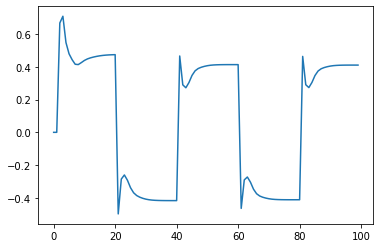

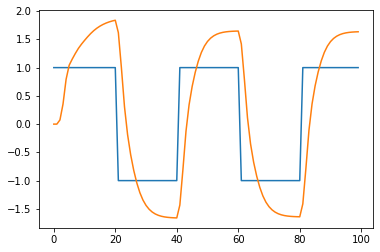

[[1.46648976]
 [0.49053877]
 [1.96034847]]


In [35]:
sample_depth = 100
sample_range = range(sample_depth)
starting_samples = 2

t = [i for i in sample_range]
u_c = np.ones(sample_depth)*-1
u_c[np.where([m.sin(t[i]*m.pi/20)>=0 for i in sample_range])] = 1

c = 2
d = 0.5
x = d + 1

theta0 = np.array([x, d, c]).reshape(-1,1)
theta_hat = [np.array([1]*3).reshape(-1,1) for _ in range(starting_samples)]

y = [0]*starting_samples
u = [0]*starting_samples

y1 = [0]*starting_samples
y0 = [0]*starting_samples
u0 = [0]*starting_samples

lam = 1
I = np.identity(3)
p = 100*I 
    
for k in range(2,sample_depth):
    phi = np.array([-y1[-1], -y0[-1], u0[-1]]).reshape(-1,1)
    
#     K = p@phi@inv(lam + phi.T@p@phi)
#     theta_hat.append(theta_hat[-1] + K*(phi.T@theta0 - phi.T@theta_hat[-1]))
#     p = (I - K@phi.T)@p/lam
    
    p = inv(inv(p) + phi@phi.T)
    K = p@phi
    theta_hat.append(theta_hat[-1] + K*(np.reshape(phi.T@theta0, ()) - phi.T@theta_hat[-1]))

#     theta_hat.append(theta_hat[-1] + T_val*(p@phi)*(phi.T@theta0 - phi.T@theta_hat[-1]))
#     p = p + T_val*(lam*I - p@phi@phi.T)@p

#     theta_hat.append(T_val*(p@phi)*(phi.T@theta0 - phi.T@theta_hat[-1]))
#     p = p + T_val*(lamb*I - p@phi@phi.T)@p
    
    
    u.append(np.reshape(uk_func(u[k-1], u_c[k], u_c[k-1], phi.T@theta0, y[k-1], theta_hat[-1][2], theta_hat[-1][1]), ()))
    y.append(np.reshape(yk_func(u[k], u[k-1], u[k-2], y[k-1], y[k-2], theta_hat[k][2], theta_hat[-1][1]), ()))
    
    y1.append(np.reshape(y1_k_func(y[k], y[k-2], y1[k-1], y1[k-2]), ()))
    y0.append(np.reshape(y0_k_func(y[k], y[k-1], y[k-2], y0[k-1], y0[k-2]), ()))
    u0.append(np.reshape(u0_k_func(u[k], u[k-1], u[k-2], u0[k-1], u0[k-2]), ()))
    

# pd.DataFrame(np.asarray(theta_hat).reshape(-1,4,), 
#                    columns=['a1', 'a2', 'b0', 'b1'])
plt.plot(t,u)
plt.show()

plt.plot(t,u_c)
plt.plot(t,y)
plt.show()
print(theta_hat[-1])

# Problem 2

## part 1

## part 2

In [148]:
a1, a2, b0, b1 = sp.symbols('a_{1} a_{2} b_{0} b_{1}')
am1, am2, bm0, bm1 = sp.symbols('a_{m1} a_{m2} b_{m0} b_{m1}')
s, q = sp.symbols('s q')
r1, s0, s1, a0 = sp.symbols('r_1 s_0 s_1 a_0')

a_m1 = -0.503215
a_m2 = 0.0497871

A = q**2 + a1*q + a2
B = b0*q + b1

A_pol = sp.Poly(A)
B_pol = sp.Poly(B)

B_minus = b0
B_plus = simplify(B/B_minus)
H = B/A
H

  b_{0}⋅q + b_{1}   
────────────────────
                   2
a_{1}⋅q + a_{2} + q 

$B = B^{-}B^{+} = \;$({{B_minus}})({{B_plus}})

Therfore,

$$Deg(B^-) = 0$$

and 

$$Deg(B^+) = Deg(B) = Deg(B_m) = 1$$

Additionally

$$Deg(A) = Deg(A_m) = 2$$

$$Deg(S) = Deg(R) = Deg(A) - 1 = 2 - 1 = 1$$

$$Deg(R^{'}) = Deg(R) - Deg(B^+) = 1 - 1 = 0$$

$$Deg(A_0) = Deg(A) + Deg(R^{'}) - Deg(A_m) = 2 + 0 - 2 = 0$$

In [123]:
A0 = 1
S = s0*q + s1
R = B_plus
R_prime = 1
Am = q**2 + am1*q + am2
Bm = Am.subs(q,1)*q**B_pol.degree()
T = simplify(A0*Bm/B_minus)

The control polynomials become

$A_0 =\;${{A0}}

$S =\;${{S}}

$R =\;${{R}}

$R^{'} =\;${{R_prime}}

$A_m =\;${{Am}}

Additionally, to achive unity gain, the final value theorem can implemented on $A_m$ to obtain the value of $B_m$. This is achived by the equation $B_m = A_m(1)q^m$.This way, when k goes to infinity ($q \rightarrow 1$), $G_m = 1$ and $Deg(B_m) = Deg(B)$. Therfore,

$B_m =\;${{Bm}}

From this result, $T$ can be calculated

$T =\;${{T}} 

In [114]:
LHS_coeffs = sp.Poly(A*R_prime + B_minus*S, q).coeffs()[::-1]
RHS_coeffs = sp.Poly(A0*Am, q).coeffs()[::-1]

s_0 = sp.solve(sp.Eq(LHS_coeffs[1], RHS_coeffs[1]), s0)[0]
s_1 = sp.solve(sp.Eq(LHS_coeffs[0], RHS_coeffs[0]), s1)[0]

Solving the diophantine equation

 $AR^{'} + B^{-}S = A_0A_m \;\;\;\Rightarrow \;\;\;$ {{A}} $\;+\;${{B_minus}}{{S}}$\;=\;${{Am}}
 
 yeilds the following control paramters
 
 $s_0 =\;${{s_0}}
 
 $s_1 =\;${{s_1}}

In [125]:
S_ = S.subs([(s0, s_0), (s1, s_1)])
R_ = R
T_ = T

The $R$ and $T$ polynomials are the same when expressed in terms of control parameters while $S$ becomes

$S =\;${{S_}}

## Control equation

In [168]:
TR = simplify(T/R)
SR = simplify(S/R).subs([(s0, s_0), (s1, s_1)])

obj_TR = numden_coeff(TR, 1, 1, q)
obj_SR = numden_coeff(SR, 1, 1, q)

aTR = obj_TR.lst_denum_coeff
bTR = obj_TR.lst_num_coeff

aSR = obj_SR.lst_denum_coeff
bSR = obj_SR.lst_num_coeff

For $\frac{T}{R}$, the coefficients of the numerator and denominator are

$\alpha\frac{T}{R} =\;$ {{aTR}} 

and

$\beta\frac{T}{R} =\;$ {{bTR}}

while the coefficients of the numerator and denominator for $\frac{S}{R}$ are

$\alpha\frac{S}{R} =\;$ {{aSR}}

and

$\beta\frac{S}{R} =\;$ {{bSR}}

In [181]:
u_k, u_k_1, uc_k, y_k, y_k_1, y_k_2 = sp.symbols('u(k) u(k-1) u_{c}(k) y(k) y(k-1) y(k-2)')

uk = -u_k_1*aTR[1] + uc_k*bTR[0] - y_k*bSR[0] - y_k_1*bSR[1]
uk

  b_{1}⋅u(k-1)   u_{c}(k)⋅(a_{m1} + a_{m2} + 1)   y(k)⋅(-a_{1} + a_{m1})   y(k
- ──────────── + ────────────────────────────── - ────────────────────── - ───
     b_{0}                   b_{0}                        b_{0}               

-1)⋅(-a_{2} + a_{m2})
─────────────────────
      b_{0}          

In [182]:
uk_subd = uk.subs([(am1, a_m1), (am2, a_m2)])

uk_func = sp.lambdify([u_k_1, uc_k, y_k, y_k_1, a1, a2, b0, b1], uk_subd)

# dont need this vvvvvvvvvvvvvvvvvvvvvvv

In [192]:
# dont need this!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
obj_H = numden_coeff(H, 1, 2, q)

aH = obj_H.lst_denum_coeff
bH = obj_H.lst_num_coeff
yk = -y_k_1*aH[1] - y_k_2*aH[2] + u_k_1*bH[0] + u_k_2*bH[1]

yk_func = sp.lambdify([y_k_1, y_k_2, u_k_1, u_k_2, a1, a2, b0, b1], yk)

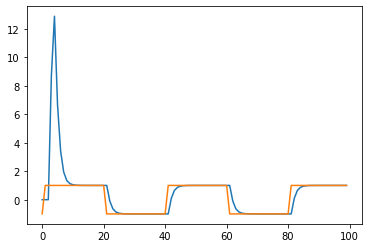

In [204]:
# Tunable components vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
sample_depth = 100
starting_samples = 2

lam = 1

# true plant parameters
a1 = -0.503215
a2 = 0.0497871
b0 = 1.59831
b1 = 0.587984
theta0 = np.array([a1, a2, b0, b1]).reshape(-1,1)

# starting estimate for plant parameters
est = 0.1
# Tunable components ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

sample_range = range(sample_depth)
t = [i for i in sample_range]
u_c = np.ones(sample_depth)
u_c[np.where([m.sin(t[i]*m.pi/20)<=0 for i in sample_range])] = -1

theta_hat = [np.array([est]*len(theta0)).reshape(-1,1) for _ in range(starting_samples)]

y = [0]*starting_samples
u = [0]*starting_samples

I = np.identity(len(theta0))
p = 100*I 
    
for k in range(starting_samples ,sample_depth):
    phi = np.array([-y[-1], -y[-2], u[-1], u[-2]]).reshape(-1,1)
    
    y.append(np.reshape(phi.T@theta0, ()))
    K = p@phi@inv(lam + phi.T@p@phi)
    p = (I - K@phi.T)@p/lam
    theta_hat.append(theta_hat[-1] + K*(y[k] - phi.T@theta_hat[-1]))
    
#     y.append(np.reshape(phi.T@theta0, ()))
#     p = inv(inv(p) + phi@phi.T)
#     K = p@phi    
#     theta_hat.append(theta_hat[-1] + K*(y[k] - phi.T@theta_hat[-1]))
    
    u.append(np.reshape(uk_func(u[k-1], u_c[k], y[k], y[k-1], 
                                theta_hat[-1][0], theta_hat[-1][1], 
                                theta_hat[-1][2], theta_hat[-1][3]), ()))
    
plt.plot(t, y)
plt.plot(t, u_c)